IndexError: single positional indexer is out-of-bounds

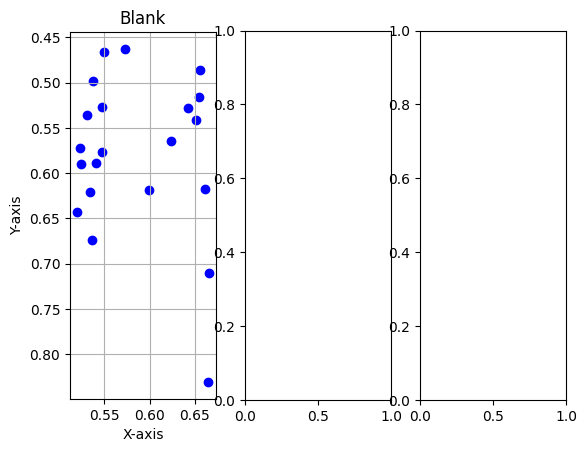

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import random

def plotData(df, row_index, ax, color, title):
    if df is not None:
        row = df.iloc[row_index]
        x_coords = [row[f"landmark_{i}_x"] for i in range(0, num_landmarks)]
        y_coords = [row[f"landmark_{i}_y"] for i in range(0, num_landmarks)]
        ax.scatter(x_coords, y_coords, color=color)
        ax.set_title(title)
        ax.set_xlabel("X-axis")
        ax.set_ylabel("Y-axis")
        ax.invert_yaxis()
        ax.grid(True)
        ax.set_aspect('equal')

#row_index = 0  # Random row
numPlots = 0
num_landmarks = 21 # Number of landmarks

try:
    df_blank = pd.read_csv("blank_data.csv")
    numPlots += 1
except:
    print("blank_data.csv not found. Please run the script to generate the data first.")
    df_blank = None

try:
    df_up = pd.read_csv("thumbs_up_data.csv")
    numPlots += 1

except:
    print("thumbs_up_data.csv not found. Please run the script to generate the data first.")
    df_up = None

try:
    df_down = pd.read_csv("thumbs_down_data.csv")
    numPlots += 1
except:
    print("thumbs_down_data.csv not found. Please run the script to generate the data first.")
    df_down = None


fig, axes = plt.subplots(1, numPlots)

if numPlots == 1:
    axes = [axes]

# Pick random entry to plot
plotData(df_blank, random.randint(0, len(df_blank) - 1), axes[0], 'blue', df_blank['gesture_label'][0])
plotData(df_up, random.randint(0, len(df_blank) - 1), axes[1], 'red', df_up['gesture_label'][0])
plotData(df_down, random.randint(0, len(df_blank) - 1), axes[2], 'green', df_down['gesture_label'][0])

# Check to see data points make sense, i.e., plots looks like a hand
plt.subplots_adjust(wspace=5)
plt.tight_layout()
plt.show()

In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Combine and randomize the datasets for training
df = pd.concat([df_blank, df_up, df_down])
df.sample(frac=1).reset_index(drop=True)

X = df.drop(columns=["gesture_label"]) # get the landmark coordinates
y = df["gesture_label"].values # get the gesture labels

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)  # Encodes labels as integers (0, 1, 2)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(63,)),  # Hidden layer 1
    Dropout(0.3),  # Dropout for regularization
    Dense(64, activation='relu'),  # Hidden layer 2
    Dropout(0.3),
    Dense(3, activation='softmax')  # Output layer (3 classes)
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")
print(f"Loss: {loss:.2f}")

Epoch 1/30


/Users/ishraqanwar/git/AutoDoorLock/DoorLockEnv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5312 - loss: 0.9986 - val_accuracy: 0.6509 - val_loss: 0.6855
Epoch 2/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - accuracy: 0.6664 - loss: 0.7085 - val_accuracy: 0.7781 - val_loss: 0.4193
Epoch 3/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - accuracy: 0.8485 - loss: 0.4528 - val_accuracy: 0.9527 - val_loss: 0.2490
Epoch 4/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - accuracy: 0.9171 - loss: 0.2876 - val_accuracy: 0.9822 - val_loss: 0.1409
Epoch 5/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.9482 - loss: 0.1898 - val_accuracy: 0.9586 - val_loss: 0.1069
Epoch 6/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - accuracy: 0.9631 - loss: 0.1400 - val_accuracy: 0.9852 - val_loss: 0.0742
Epoch 7/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - accuracy: 0.9669 - loss: 0.1021 - val_accuracy: 0.9911 - val_loss: 0.0468
Epoch 8/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - accuracy: 0.9879 - loss: 0.0597 - val_accuracy: 0.9882 - val_lo

In [45]:
model.save("hand_gesture_model.keras") # Save the model